Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

Exploring the dataset

In [3]:
df.shape

(400, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Converting categorical data to numerical data

In [6]:
num_gender=pd.get_dummies(df['Gender'],drop_first=True)
num_gender

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


Choosing independent features 

In [7]:
X=df.iloc[:,2:4]

In [8]:
X=pd.concat([X,num_gender],axis=1,ignore_index=True)

In [9]:
X

,0,1,2
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


Choosing dependent features

In [10]:
Y=df.iloc[:,4]

In [11]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

Splitting the train and test dataset

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.33)

Standardizing the features

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler

StandardScaler()

Fit and transform the train data

In [14]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)

Transform the train data

In [15]:
X_test = scaler.transform(X_test)

Using KNN with k=1 and fitting the model with train data

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

Predicting value of Y from the model

In [17]:
Y_pred = knn.predict(X_test)

Confusion matrix and Classification Report to check the accuracy of the model

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        85
           1       0.82      0.79      0.80        47

    accuracy                           0.86       132
   macro avg       0.85      0.85      0.85       132
weighted avg       0.86      0.86      0.86       132

[[77  8]
 [10 37]]


Calculating knn score

In [19]:
knn.score(X_test, Y_test)

0.8636363636363636

Choosing value for k 

In [20]:
train_accuracy=[]
test_accuracy=[]

k=range(1,25)

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    train_accuracy.append(knn.score(X_train, Y_train))
    test_accuracy.append(knn.score(X_test, Y_test))

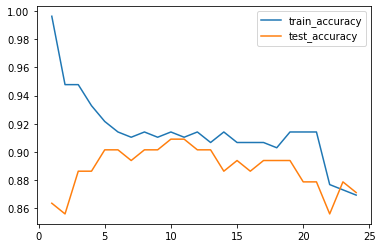

In [21]:
plt.plot(k,train_accuracy,label="train_accuracy")
plt.plot(k,test_accuracy,label="test_accuracy")
plt.legend()

Using KNN with k=6(from graph) and fitting the model with train data

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=6)

Predicting value of Y from the model

In [23]:
Y_pred = knn.predict(X_test)

Confusion matrix and Classification Report to check the accuracy of the model

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        85
           1       0.85      0.87      0.86        47

    accuracy                           0.90       132
   macro avg       0.89      0.89      0.89       132
weighted avg       0.90      0.90      0.90       132

[[78  7]
 [ 6 41]]


In [25]:
knn.score(X_test, Y_test)

0.9015151515151515